# Machine Learning Pipeline - Model Training with Oversampled Label

In this notebook, we will oversample the minority class of the original dataset with the SMOTE technique. We will then proceed to train a number of selected machine learning models with all the original features of the dataset and observe the differences in performance with evaluation results on the selected features.

In [1]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')

# to save the model
import joblib

# algorithms to build and train the models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# to evaluate the model
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score

# to scale the features
from sklearn.preprocessing import MinMaxScaler

# to oversample the minority class
from imblearn.over_sampling import SMOTE

# to visualise all the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [2]:
# load the train and test set with the engineered variables
X_train = pd.read_csv('xtrain_unscaled.csv')
X_test = pd.read_csv('xtest_unscaled.csv')

In [3]:
y_train = pd.read_csv('ytrain.csv')
y_test = pd.read_csv('ytest.csv')

Let's visualise the original distribution of the target labels for some context.

<AxesSubplot:xlabel='Response', ylabel='count'>

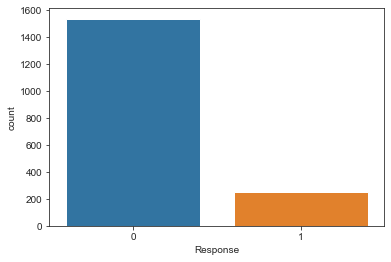

In [4]:
sns.countplot(x='Response',data=y_train)

In [5]:
y_train.value_counts()

Response
0           1538
1            254
dtype: int64

Let's run the smote operation on the training data and observe the new distribution of the target labels.

In [6]:
smote = SMOTE(sampling_strategy='minority',random_state=0)
X_sm, y_sm = smote.fit_resample(X_train,y_train)

<AxesSubplot:xlabel='Response', ylabel='count'>

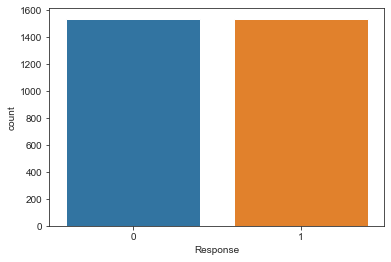

In [7]:
sns.countplot(x='Response',data=y_sm)

In [8]:
y_sm.value_counts()

Response
0           1538
1           1538
dtype: int64

Notice that we now have parity in the label counts.

# Feature Scaling

We have to scale our features because a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the original unit of the values. 

Since scaling is typically done to limit value between 0 and 1, we will exclude our binary features and focus on non-binary/discrete and continuous features. 

Let's grab the features that have more than 2 unique values:

In [9]:
# list out all the continuous variables that will be scaled
scaled = [feat for feat in X_train.columns if X_train[feat].nunique() > 2]
scaled

['Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth']

In [10]:
# load the scaler object
scaler = MinMaxScaler()

# fit the train set
scaler.fit(X_sm[scaled])

# transform the train and test set
X_sm[scaled] = scaler.transform(X_sm[scaled])
X_test[scaled] = scaler.transform(X_test[scaled])

In [11]:
# display the scaled dataset
X_sm[scaled].head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,0.233010,0.50,0.285714,0.095207,0.0,0.5,0.0,0.545455,0.430295,0.070352,0.028406,0.000000,0.026718,0.177570,0.066667,0.333333,0.071429,0.692308,0.25
1,0.242718,0.25,0.428571,0.070264,0.0,0.0,1.0,0.909091,0.415550,0.271357,0.138551,0.382239,0.374046,0.370717,0.133333,0.333333,0.250000,0.769231,0.35
2,0.155340,1.00,0.714286,0.051722,0.5,0.0,0.0,0.232323,0.010724,0.005025,0.001159,0.000000,0.000000,0.003115,0.066667,0.037037,0.000000,0.230769,0.25
3,0.475728,1.00,0.142857,0.119128,0.0,0.0,0.0,0.898990,0.839142,0.000000,0.269565,0.177606,0.133588,0.000000,0.066667,0.148148,0.178571,0.615385,0.05
4,0.097087,0.50,0.142857,0.121324,0.5,0.0,0.0,0.828283,0.544236,0.497487,0.249855,0.915058,0.568702,0.102804,0.066667,0.407407,0.142857,0.769231,0.25


# Model Training

To train the model, we will be trying the following learning approaches:

- Logistic Regression
- Decision Trees
- Random Forests
- Nearest Neighbors
- Support Vector Machines

Our metric of priority will be the f-1 score for the 'Y' label, i.e. the 1 class considering the imbalanced nature of the dataset.

In [12]:
# dictionary to store the f1 scores and accuracy scores of the models
f1_scores = {}
accuracy_scores = {}
precision_scores = {}
recall_scores = {}

## Logistic Regression

In [13]:
log_model = LogisticRegression()
log_model.fit(X_sm,y_sm['Response'])
log_preds = log_model.predict(X_test)

f1_scores['log_model'] = f1_score(y_test,log_preds)
accuracy_scores['log_model'] = accuracy_score(y_test,log_preds)
precision_scores['log_model'] = precision_score(y_test,log_preds)
recall_scores['log_model'] = recall_score(y_test,log_preds)

print(confusion_matrix(y_test,log_preds))
print()
print(classification_report(y_test,log_preds))

[[292  76]
 [ 20  60]]

              precision    recall  f1-score   support

           0       0.94      0.79      0.86       368
           1       0.44      0.75      0.56        80

    accuracy                           0.79       448
   macro avg       0.69      0.77      0.71       448
weighted avg       0.85      0.79      0.80       448



## Decision Tree

In [14]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_sm,y_sm['Response'])
tree_preds = tree_model.predict(X_test)

f1_scores['tree_model'] = f1_score(y_test,tree_preds)
accuracy_scores['tree_model'] = accuracy_score(y_test,tree_preds)
precision_scores['tree_model'] = precision_score(y_test,tree_preds)
recall_scores['tree_model'] = recall_score(y_test,tree_preds)

print(confusion_matrix(y_test,tree_preds))
print()
print(classification_report(y_test,tree_preds))

[[310  58]
 [ 36  44]]

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       368
           1       0.43      0.55      0.48        80

    accuracy                           0.79       448
   macro avg       0.66      0.70      0.68       448
weighted avg       0.81      0.79      0.80       448



## Random Forests

In [15]:
forest_model = RandomForestClassifier(n_estimators=200,random_state=0)
forest_model.fit(X_sm,y_sm['Response'])
forest_preds = forest_model.predict(X_test)

f1_scores['forest_model'] = f1_score(y_test,forest_preds)
accuracy_scores['forest_model'] = accuracy_score(y_test,forest_preds)
precision_scores['forest_model'] = precision_score(y_test,forest_preds)
recall_scores['forest_model'] = recall_score(y_test,forest_preds)

print(confusion_matrix(y_test,forest_preds))
print()
print(classification_report(y_test,forest_preds))

[[340  28]
 [ 29  51]]

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       368
           1       0.65      0.64      0.64        80

    accuracy                           0.87       448
   macro avg       0.78      0.78      0.78       448
weighted avg       0.87      0.87      0.87       448



## Nearest Neighbors

In [16]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_sm,y_sm['Response'])
knn_preds = knn_model.predict(X_test)

f1_scores['knn_model'] = f1_score(y_test,knn_preds)
accuracy_scores['knn_model'] = accuracy_score(y_test,knn_preds)
precision_scores['knn_model'] = precision_score(y_test,knn_preds)
recall_scores['knn_model'] = recall_score(y_test,knn_preds)

print(confusion_matrix(y_test,knn_preds))
print()
print(classification_report(y_test,knn_preds))

[[275  93]
 [ 18  62]]

              precision    recall  f1-score   support

           0       0.94      0.75      0.83       368
           1       0.40      0.78      0.53        80

    accuracy                           0.75       448
   macro avg       0.67      0.76      0.68       448
weighted avg       0.84      0.75      0.78       448



## Support Vector Machines

In [17]:
svc_model = SVC()
svc_model.fit(X_sm,y_sm['Response'])
svc_preds = svc_model.predict(X_test)

f1_scores['svc_model'] = f1_score(y_test,svc_preds)
accuracy_scores['svc_model'] = accuracy_score(y_test,svc_preds)
precision_scores['svc_model'] = precision_score(y_test,svc_preds)
recall_scores['svc_model'] = recall_score(y_test,svc_preds)

print(confusion_matrix(y_test,svc_preds))
print()
print(classification_report(y_test,svc_preds))

[[313  55]
 [ 25  55]]

              precision    recall  f1-score   support

           0       0.93      0.85      0.89       368
           1       0.50      0.69      0.58        80

    accuracy                           0.82       448
   macro avg       0.71      0.77      0.73       448
weighted avg       0.85      0.82      0.83       448



# Model Evaluation

Let's plot out the f1 scores and the accuracy scores from all our models:

Text(0.5, 1.0, 'Model Evaluation')

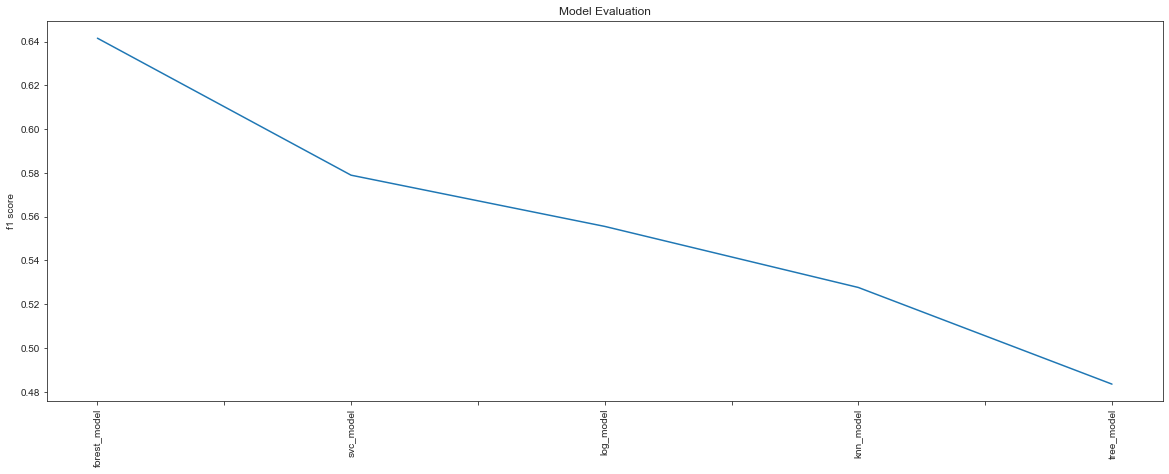

In [18]:
pd.Series(f1_scores).sort_values(ascending=False).plot.line(rot=90,figsize=(20,7))
plt.ylabel('f1 score')
plt.title('Model Evaluation')

Text(0.5, 1.0, 'Model Evaluation')

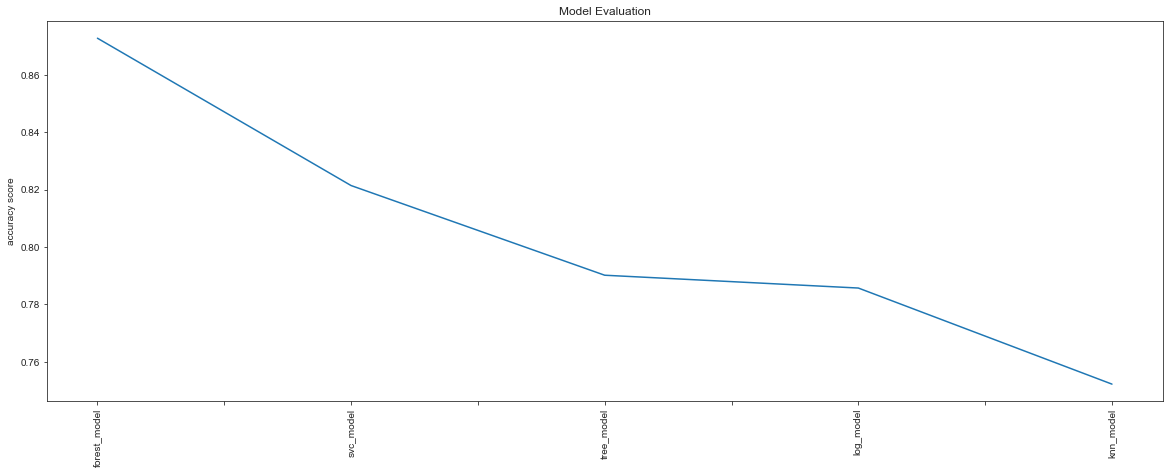

In [19]:
pd.Series(accuracy_scores).sort_values(ascending=False).plot.line(rot=90,figsize=(20,7))
plt.ylabel('accuracy score')
plt.title('Model Evaluation')

Text(0.5, 1.0, 'Model Evaluation')

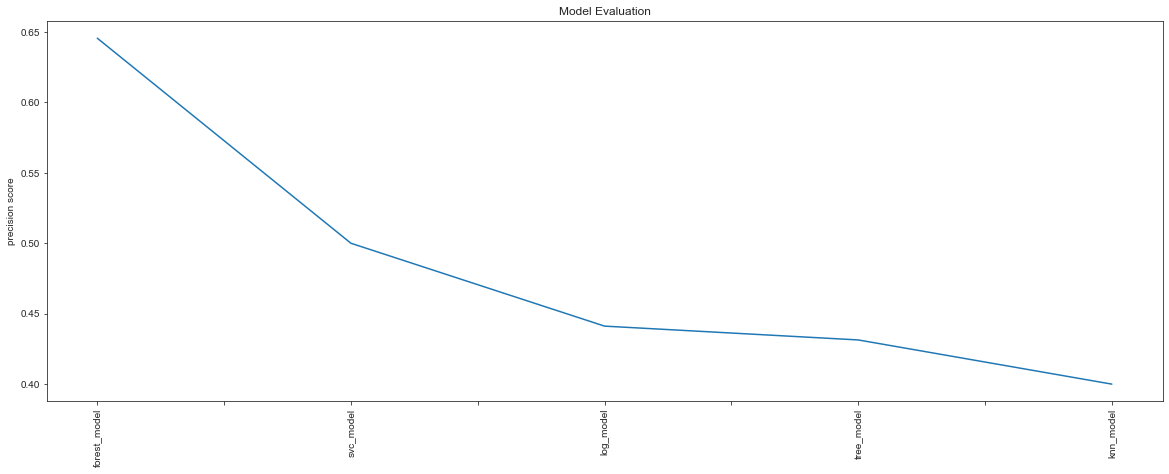

In [20]:
pd.Series(precision_scores).sort_values(ascending=False).plot.line(rot=90,figsize=(20,7))
plt.ylabel('precision score')
plt.title('Model Evaluation')

Text(0.5, 1.0, 'Model Evaluation')

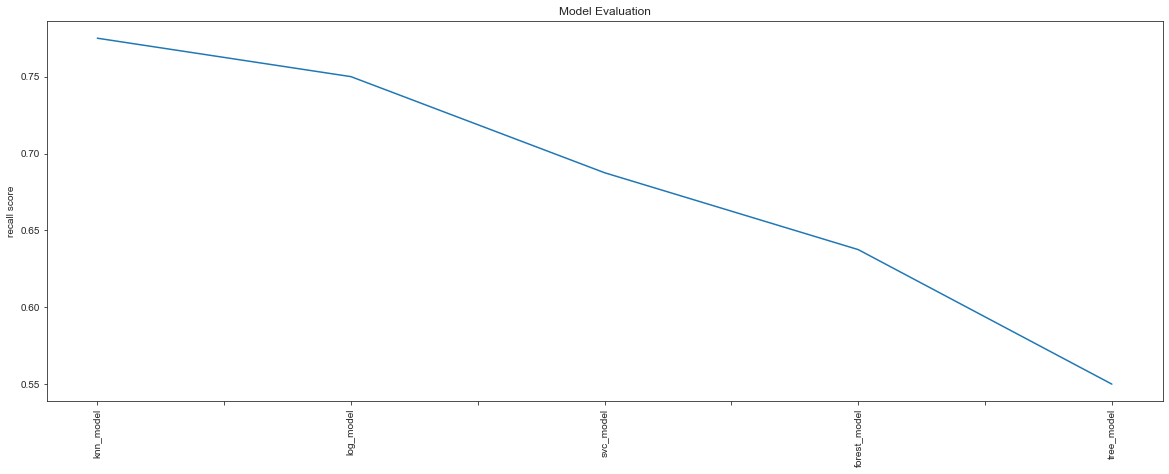

In [21]:
pd.Series(recall_scores).sort_values(ascending=False).plot.line(rot=90,figsize=(20,7))
plt.ylabel('recall score')
plt.title('Model Evaluation')

Notice the recall scores have improved but only at a cost to precision, i.e. the models are making more false positive selections than false negative selections now. We have sacrificed a little familiarity with the negative class for familiarity with the positive class, even though it is not as familiar with the positive class as we would have hoped.

The performances are pretty impressive when you consider the small and medium effects we computed during feature selection. 